# Objective

* the goal here is be able to simulate some actual cloud data so that we can create an environment that can learn to autoscale

IDEA: 
* make a simple model first
* can we fit an learned model on top of that simple model?
* can we train an autoencoder /decoder that can learn to do this


* maybe something variational so that it can learn the distribution



## Questions
* can we go from low directly to high?
* can we model this simply??

***


In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))

from simple_mmpp_simulation import simulate_mmpp, plot_mmpp_simulation

## Simple MMPP process

An Markov Modulated Poisson Process (MMPP)
* a doubly stochastic Poisson process where the rate  (intensity) of the Poisson process is governed by an underlying Markov process.
* we  create a two-state MMPP where the process switches between two states, each with its own Poisson rate.
* the (lambda) rate changes depending on which "state" a hidden markov process is in
* there are different rates for when the system is "busy" vs "idle" and the switches follow a markov chain
* captures `bursty` arrivals and correlated traffic patterns
* the arrival process alternates between different intensities producing bursts of arrivals


### On real data we should

* fit a kstate poisson-hmm via em
* viterbi-decoded state sequences




In [2]:
# reference, need to justify these values
rates = [
    5,
    50,
    200,
]  # lambdas for the Poisson process in different states (idle, normal, busy)

transitions = [
    [0.90, 0.09, 0.01],  # from idle to idle, normal, busy
    [0.15, 0.80, 0.05],  # from normal to idle, normal, busy
    [0.05, 0.15, 0.80],  # from busy to idle, normal, busy
]

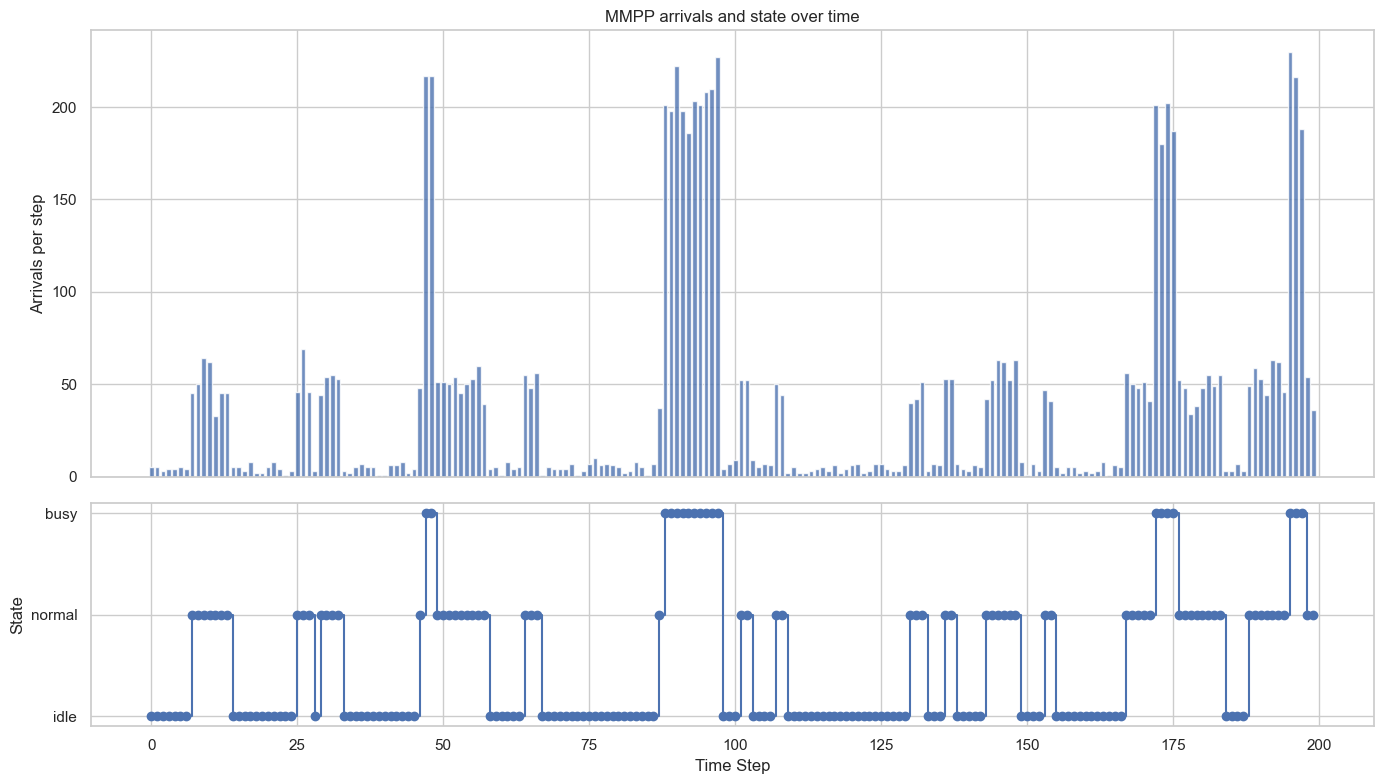

In [3]:
arrivals, states_ = simulate_mmpp(duration=200, seed=42)
plot_mmpp_simulation(arrivals, states_)

***

Figure 1: Simulated Server Load over time

We can see the jump from idle to normal and normal to busy, with each state being a bit sticky.

## Build the Env

following this environment, we are going to make an openai gym environment that can be easily reused to test our model

https://gymnasium.farama.org/api/env/



The main Gymnasium class for implementing Reinforcement Learning Agents environments.

The class encapsulates an environment with arbitrary behind-the-scenes dynamics through the step() and reset() functions. An environment can be partially or fully observed by single agents. For multi-agent environments, see PettingZoo.

The main API methods that users of this class need to know are:

* `step()` - Updates an environment with actions returning the next agent observation, the reward for taking that actions, if the environment has terminated or truncated due to the latest action and information from the environment about the step, i.e. metrics, debug info.
* `reset()` - Resets the environment to an initial state, required before calling step. Returns the first agent observation for an episode and information, i.e. metrics, debug info.
* `render()` - Renders the environments to help visualise what the agent see, examples modes are “human”, “rgb_array”, “ansi” for text.
* `close()` - Closes the environment, important when external software is used, i.e. pygame for rendering, databases

Environments have additional attributes for users to understand the implementation
* `action_space` - The Space object corresponding to valid actions, all valid actions should be contained within the space.
* `observation_space` - The Space object corresponding to valid observations, all valid observations should be contained within the space.
* `spec` - An environment spec that contains the information used to initialize the environment from gymnasium.make()
* `metadata` - The metadata of the environment, e.g. {“render_modes”: [“rgb_array”, “human”], “render_fps”: 30}. For Jax or Torch, this can be indicated to users with “jax”=True or “torch”=True.
* `np_random` - The random number generator for the environment. This is automatically assigned during super().reset(seed=seed) and when assessing np_random.


In [4]:
from gymnasium import Env

class SimpleMMppEnv(Env):
    """
    A simple environment that simulates a Markov Modulated Poisson Process (MMPP) for load generation.
    
    This environment can be used to test and develop reinforcement learning algorithms for cloud autoscaling.
    
    The main API methods that users of this class need to know are:
    * `step()` - Updates an environment with actions returning the next agent observation, the reward for taking that actions, if the environment has terminated or truncated due to the latest action and information from the environment about the step, i.e. metrics, debug info.
    * `reset()` - Resets the environment to an initial state, required before calling step. Returns the first agent observation for an episode and information, i.e. metrics, debug info.
    * `render()` - Renders the environments to help visualise what the agent see, examples modes are “human”, “rgb_array”, “ansi” for text.
    * `close()` - Closes the environment, important when external software is used, i.e. pygame for rendering, databases
    """
    pass

    def __init__(self):
        super().__init__()
        # Define action and observation space
        # They must be gymnasium.spaces objects
        # Example when using discrete actions:
        # self.action_space = spaces.Discrete(2)
        # Example for using image as input:
        # self.observation_space = spaces.Box(low=0, high=255,
        #                                     shape=(HEIGHT, WIDTH, N_CHANNELS), dtype=np.uint8)
    
    def step(self, action):
        """
        Execute one time step within the environment.
        """
        pass
    
    def reset(self, seed=None, options=None):
        """
        Reset the state of the environment to an initial state.
        """
        pass
    
    def render(self, mode="human"):
        """
        Render the environment to the screen.
        """
        pass

    def close(self):
        """
        Close the environment.
        """
        pass
